# Homework 1: Applied Machine Learning - Linear | Logisitc | SVM

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score

In [2]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [3]:
pd.options.mode.chained_assignment = None

# **Part 1: Linear Regression**

In part 1, we will use **two datasets** to train and evaluate our linear regression model.

The first dataset will be a synthetic dataset sampled from the following equations:
   
**𝜖 ∼ Normal(0,3**)

**z = 3𝑥 + 10y + 10 + 𝜖**

In [4]:
np.random.seed(0)
epsilon = np.random.normal(0, 3, 100)
x = np.linspace(0, 10, 100) 
y = np.linspace(0, 5, 100)
z = 3 * x + 10 * y + 10 + epsilon

To apply linear regression, we need to first check if the assumptions of linear regression are not violated.

Assumptions of Linear Regression:

- Linearity: $y$ is a linear (technically affine) function of $x$.
- Independence: the $x$'s are independently drawn, and not dependent on each other.
- Homoscedasticity: the $\epsilon$'s, and thus the $y$'s, have constant variance.
- Normality: the $\epsilon$'s are drawn from a Normal distribution (i.e. Normally-distributed errors)

These properties, as well as the simplicity of this dataset, will make it a good test case to check if our linear regression model is working properly.

**1.1. Plot z vs x and z vs y in the synthetic dataset as scatter plots. Label your axes and make sure your y-axis starts from 0. Do the independent and dependent features have linear relationship?**

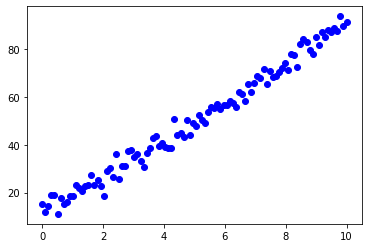

In [5]:
### Your code here
plt.plot(x,z, 'bo')

Yes, the independent and dependent features appear to have a linear relationship


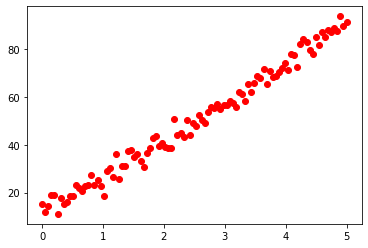

In [6]:
### Your code here
plt.plot(y, z, 'ro')
print("Yes, the independent and dependent features appear to have a linear relationship")

**1.2. Are the independent variables correlated? Use pearson correlation to verify? What would be the problem if linear regression is applied to correlated features?**

In [7]:
### Your code here
print("Yes, the independent variables, x and y, are highly correlated. They have a Pearson correlation coefficient of", np.corrcoef(x, y)[1,1])


Yes, the independent variables, x and y, are highly correlated. They have a Pearson correlation coefficient of 1.0


**The second dataset we will be using is an auto MPG dataset. This dataset contains various characteristics for around 8128 cars. We will use linear regression to predict the selling_price label**

In [8]:
auto_mpg_df = pd.read_csv('Car details v3.csv')
# Dropping Torque column, there is information in this column but it will take some preprocessing.
# The idea of the exercise is to familarize yourself with the basics of Linear regression.
auto_mpg_df = auto_mpg_df.drop(['torque'], axis = 1)

In [9]:
auto_mpg_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,5.0


In [10]:
dataTypeSeries = auto_mpg_df.dtypes
print('Data type of each column of Dataframe :')
print(dataTypeSeries)

Data type of each column of Dataframe :
name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
seats            float64
dtype: object


**1.3. Missing Value analysis - Auto mpg dataset.**

**Are there any missing values in the dataset? If so, what can be done about it? Jusify your approach.**

In [11]:
### Your code here

missing_df = auto_mpg_df.loc[auto_mpg_df.isnull().any(axis=1)]

print("Yes, there are missing values in the dataset, as shown below. There are several ways to handle missing values:\n\t - Drop the columns/features (worst case)\n\t - Drop the rows with missing values (roughly 2.5% of dataset)\n\t - Replace the missing values with the mean/median")
print("I will choose to drop the rows that are missing data, because there are only a small number of them")

display(missing_df)
fauto_mpg_df = auto_mpg_df.loc[auto_mpg_df.notnull().all(axis=1)]
#Removing an annoying value in "max_power" with no value, but not NULL (was incorrectly inputted as "bhp")
fauto_mpg_df.drop(fauto_mpg_df[fauto_mpg_df['max_power'].str.len() < 5].index, inplace = True)
display(fauto_mpg_df)


Yes, there are missing values in the dataset, as shown below. There are several ways to handle missing values:
	 - Drop the columns/features (worst case)
	 - Drop the rows with missing values (roughly 2.5% of dataset)
	 - Replace the missing values with the mean/median
I will choose to drop the rows that are missing data, because there are only a small number of them


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN
78,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN
87,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,NaN
119,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7846,Toyota Qualis Fleet A3,2000,200000,100000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN
7996,Hyundai Santro LS zipPlus,2000,140000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN
8009,Hyundai Santro Xing XS eRLX Euro III,2006,145000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN
8068,Ford Figo Aspire Facelift,2017,580000,165000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,5.0


**1.4. The features engine, max_power and mileage have units in the dataset. In the real world if we have such datasets, we generally remove the units from each feature. After doing so, convert the datatype of these columns to float. For example: 1248 CC engine is 1248, 23.4 kmpl is 23.4 and so on.**

**Hint: Check for distinct units in each of these features. A feature might have multiple units as well. Also, a feature could have no value but have unit. For example 'CC' without any value. Remove such rows.**

In [12]:
### Your code here
m_unit_set = set()
for mileage in fauto_mpg_df["mileage"]:
    m_unit_set.add(mileage[-5:])

print("Distinct units in mileage:\t" + str(m_unit_set))

p_unit_set = set()
for power in fauto_mpg_df["max_power"]:
    p_unit_set.add(power[-4:])

print("Distinct units in max_power:\t" + str(p_unit_set))

e_unit_set = set()
for power in fauto_mpg_df["engine"]:
    e_unit_set.add(power[-3:])

print("Distinct units in engine:\t" + str(e_unit_set))

Distinct units in mileage:	{' kmpl', 'km/kg'}
Distinct units in max_power:	{' bhp'}
Distinct units in engine:	{' CC'}


In [13]:
def change_mileage(mileage):
    if "km/kg" in mileage:
        return float(mileage[:-6])
    elif "kmpl" in mileage:
        return float(mileage[:-5])
    return mileage

def change_power(power):
    return float(power[:-4])

def change_engine(engine):
    return float(engine[:-3])

def change_km(km):
    return float(km)
    
fauto_mpg_df["mileage"] = fauto_mpg_df["mileage"].apply(change_mileage)
fauto_mpg_df["max_power"] = fauto_mpg_df["max_power"].apply(change_power)
fauto_mpg_df["engine"] = fauto_mpg_df["engine"].apply(change_engine)
fauto_mpg_df["km_driven"] = fauto_mpg_df["km_driven"].apply(change_km)
display(fauto_mpg_df)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500.0,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000.0,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000.0,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000.0,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000.0,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000.0,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000.0,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000.0,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0
8126,Tata Indigo CR4,2013,290000,25000.0,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0


In [14]:
auto_mpg_X = fauto_mpg_df.drop(columns=['selling_price'])
auto_mpg_y = fauto_mpg_df['selling_price']

**1.5. Plot the distribution of the label (selling_price) using a histogram. Make multiple plots with different binwidths. Make sure to label your axes while plotting.**

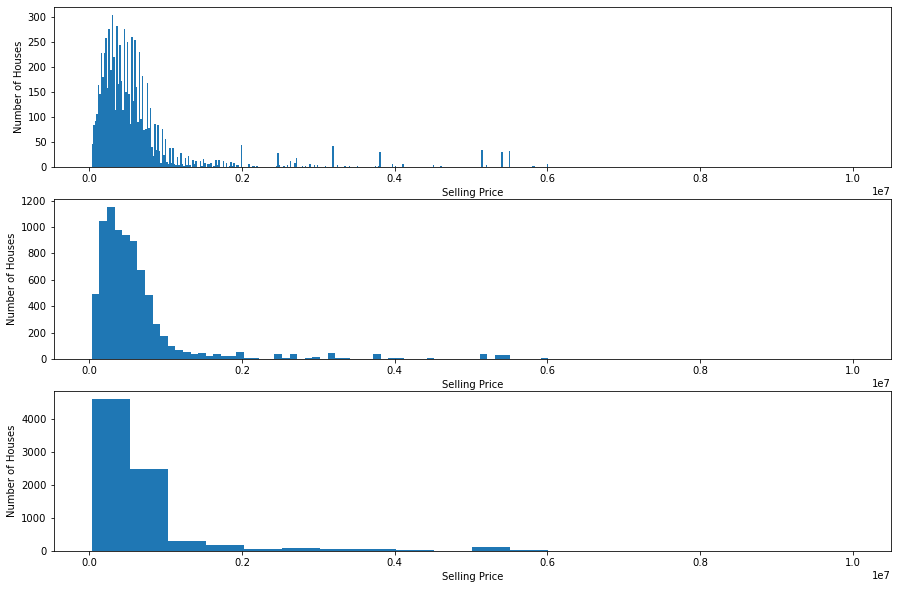

In [15]:
### Your code here
binSizes = [500,100,20]
figure, axs = plt.subplots(3, 1, figsize = (15, 10))
for index, binSize in enumerate(binSizes):
    axs[index].hist(auto_mpg_y, bins=binSize)
    axs[index].set(xlabel="Selling Price", ylabel="Number of Houses")

**1.6. Plot the relationships between the label (Selling Price) and the continuous features (Mileage, km driven, engine, max power) using a small multiple of scatter plots. 
Make sure to label the axes. Do you see something interesting about the distributions of these features.**

I can see that Engine and Max power seem to have a positive correlation with price


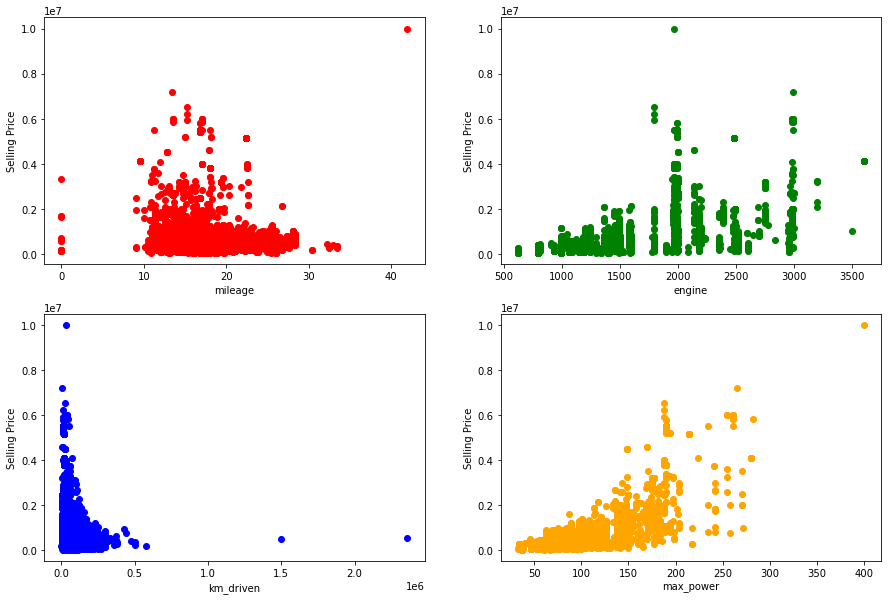

In [16]:
### Your code here
cont_ft = ['mileage', 'km_driven', 'engine', 'max_power']
colors = ['red','blue','green','orange']

figure, axs = plt.subplots(2, 2, figsize = (15, 10))
for index, feature in enumerate(cont_ft):
    xval = index%2
    yval = int(index/2)
    axs[xval, yval].scatter(auto_mpg_X[feature], auto_mpg_y, color = colors[index])
    axs[xval, yval].set(xlabel=feature, ylabel='Selling Price')

print("I can see that Engine and Max power seem to have a positive correlation with price")

**1.7. Plot the relationships between the label (Selling Price) and the discrete features (fuel type, Seller type, transmission) using a small multiple of box plots. Make sure to label the axes.**

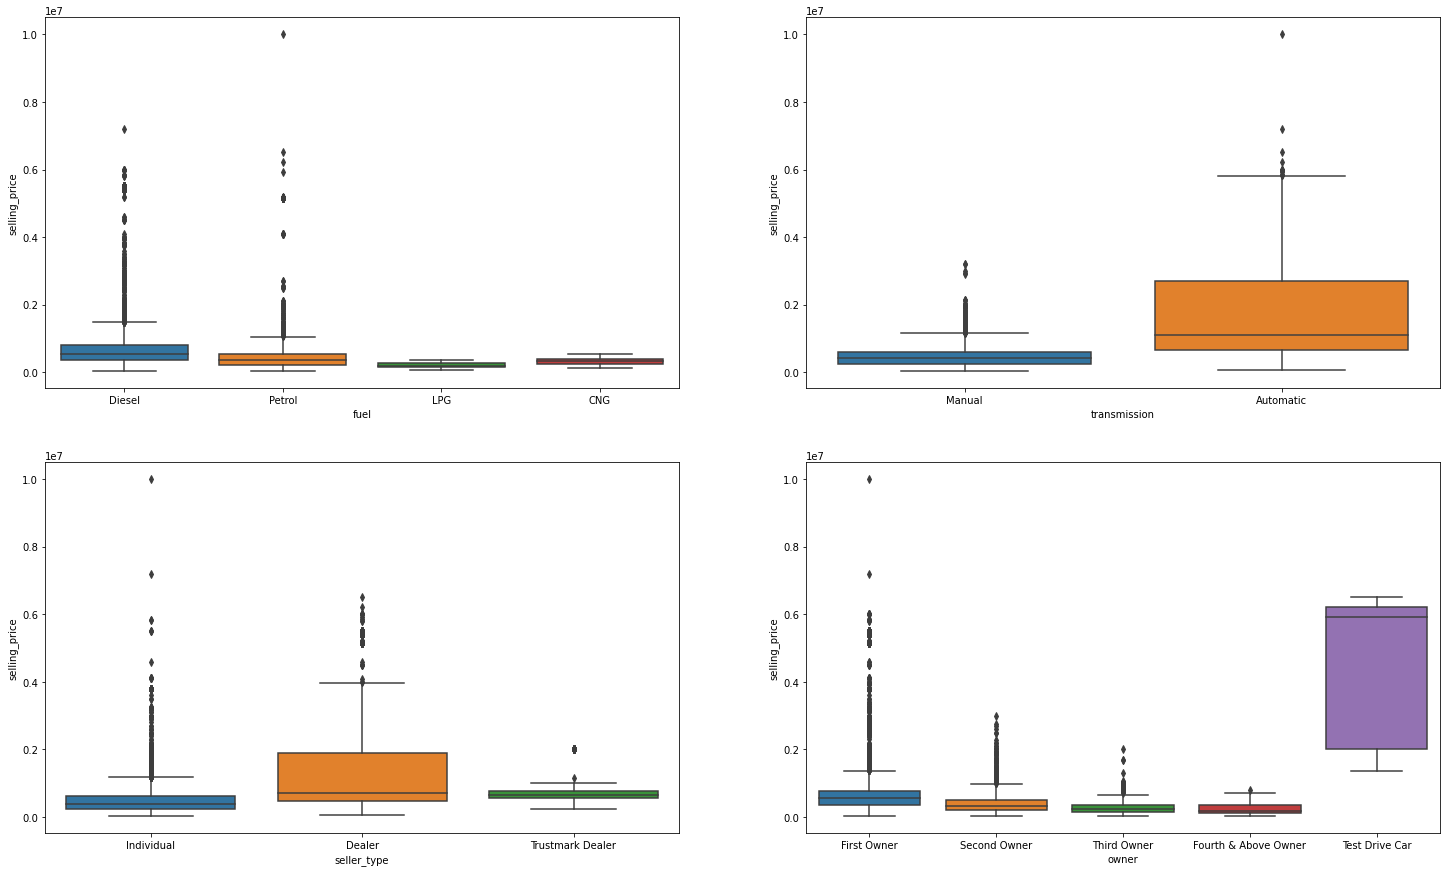

In [18]:
### Your code here
cat_ft = ['fuel', 'seller_type', 'transmission','owner']
figure, axes = plt.subplots(2, 2, figsize = (25, 15))
for index, feature in enumerate(cat_ft):
    xval = index%2
    yval = int(index/2)
    sns.boxplot(x=feature,y='selling_price', data=fauto_mpg_df, ax=axes[xval,yval])

#sns.boxplot(x='fuel',y='selling_price',data=fauto_mpg_df)

**1.8. From the visualizations above, do you think linear regression is a good model for this problem? Why and/or why not?**

In [19]:
### Your answer here
print("Yes, I think linear regression is a good model for this problem because there seems to be a strong linear correlation with some of the continuous features.")

Yes, I think linear regression is a good model for this problem because there seems to be a strong linear correlation with some of the continuous features.


In [20]:
auto_mpg_X['year'] =  2020 - auto_mpg_X['year']

In [21]:
#dropping the car name as it is irrelevant.
auto_mpg_X.drop(['name'],axis = 1,inplace=True)

#check out the dataset with new changes
auto_mpg_X.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,6,145500.0,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,6,120000.0,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,14,140000.0,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,10,127000.0,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,13,120000.0,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


**Data Pre-processing**

**1.9.
Before we can fit a linear regression model, there are several pre-processing steps we should apply to the datasets:**
1. Encode categorial features appropriately.
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices X_train, X_val, and X_test to have zero mean and unit variance. To avoid information leakage, learn the standardization parameters (mean, variance) from X_train, and apply it to X_train, X_val, and X_test.
4. Add a column of ones to the feature matrices X_train, X_val, and X_test. This is a common trick so that we can learn a coefficient for the bias term of a linear model.


In [23]:
# 1. If no categorical features in the synthetic dataset, skip this step
cat_df = auto_mpg_X[cat_ft]
cat_df_one_hot = pd.get_dummies(cat_df, dummy_na = False) #since we already removed N/A values, dont need column for them
transformed_auto_df = auto_mpg_X.drop(columns=cat_ft)
transformed_auto_df = transformed_auto_df.join(cat_df_one_hot)
print(">>>Part 1: One hot encoding")
print("Shape of data before one-hot encoding:\t" + str(auto_mpg_X.shape))
print("Shape of data after one-hot encoding:\t" + str(transformed_auto_df.shape))


# 2. Split the dataset into training (60%), validation (20%), and test (20%) sets
X_dev, X_test, y_dev, y_test = train_test_split(transformed_auto_df, auto_mpg_y, test_size = 0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size = 0.25, random_state=84)
print("\n>>>Part 2: Train-test split")
print("Shape of training data\nX_train:\t" + str(X_train.shape) + "\ny_train:\t" + str(y_train.shape))
print("\nShape of validation data\nX_val:\t" + str(X_val.shape) + "\ny_val:\t" + str(y_val.shape))
print("\nShape of test data\nX_test:\t" + str(X_test.shape) + "\ny_test:\t" + str(y_test.shape))

# 3. Standardize the columns in the feature matrices
print("\n>>>Part 3/4: Scaling data and adding 1s")
print("First row of X_train before:")
print(np.asarray([round(num, 8) for num in X_train.head(1).values.tolist()[0]]))
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) #fit and transform based on x_train, but only transform for val and test
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


# 4. Add a column of ones to the feature matrices
X_train = np.hstack((X_train_scaled, np.ones((len(X_train_scaled),1))))
X_val = np.hstack((X_val_scaled, np.ones((len(X_val_scaled),1))))
X_test = np.hstack((X_test_scaled, np.ones((len(X_test_scaled),1))))
print("\nFirst row of X_train after:")
print(X_train[0])

>>>Part 1: One hot encoding
Shape of data before one-hot encoding:	(7906, 10)
Shape of data after one-hot encoding:	(7906, 20)

>>>Part 2: Train-test split
Shape of training data
X_train:	(4743, 20)
y_train:	(4743,)

Shape of validation data
X_val:	(1581, 20)
y_val:	(1581,)

Shape of test data
X_test:	(1582, 20)
y_test:	(1582,)

>>>Part 3/4: Scaling data and adding 1s
First row of X_train before:
[5.000e+00 1.700e+05 1.299e+01 2.494e+03 1.006e+02 7.000e+00 0.000e+00
 1.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00
 1.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]

First row of X_train after:
[-0.26360703  2.02884763 -1.56515199  2.04149403  0.24837876  1.63029724
 -0.07566499  0.89825227 -0.06341936 -0.88076071 -0.4024058   0.45145
 -0.17567827 -0.38526115  0.38526115  0.71753152 -0.14064385 -0.58587161
 -0.02053903 -0.26261287  1.        ]


**At the end of this pre-processing, you should have the following vectors and matrices:**

**- Auto MPG dataset: auto_mpg_X_train, auto_mpg_X_val, auto_mpg_X_test, auto_mpg_y_train, auto_mpg_y_val, auto_mpg_y_test**

**Implement Linear Regression**

Now, we can implement our linear regression model! Specifically, we will be implementing ridge regression, which is linear regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for linear regression is:

$$
y = X w
$$

Note that we can omit the bias term here because we have included a column of ones in our $X$ matrix, so the bias term is learned implicitly as a part of $w$. This will make our implementation easier.

Our objective in linear regression is to learn the weights $w$ which best fit the data. This notion can be formalized as finding the optimal $w$ which minimizes the following loss function:

$$
\min_{w} \| X w - y \|^2_2 + \alpha \| w \|^2_2 \\
$$

This is the ridge regression loss function. The $\| X w - y \|^2_2$ term penalizes predictions $Xw$ which are not close to the label $y$. And the $\alpha \| w \|^2_2$ penalizes large weight values, to favor a simpler, more generalizable model. The $\alpha$ hyperparameter, known as the regularization parameter, is used to tune the complexity of the model - a higher $\alpha$ results in smaller weights and lower complexity, and vice versa. Setting $\alpha = 0$ gives us vanilla linear regression.

Conveniently, ridge regression has a closed-form solution which gives us the optimal $w$ without having to do iterative methods such as gradient descent. The closed-form solution, known as the Normal Equations, is given by:

$$
w = (X^T X + \alpha I)^{-1} X^T y
$$

**1.10. Implement a `LinearRegression` class with two methods: `train` and `predict`. You may NOT use sklearn for this implementation. You may, however, use `np.linalg.solve` to find the closed-form solution. It is highly recommended that you vectorize your code.**

In [36]:
class LinearRegression():
    '''
    Linear regression model with L2-regularization (i.e. ridge regression).

    Attributes
    ----------
    alpha: regularization parameter
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0):
        self.alpha = alpha
        self.w = None

    def train(self, X, y):
        '''Trains model using ridge regression closed-form solution 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        None
        '''
        
        Xt = X.T
        n = X.shape[1]
        aI = self.alpha*np.identity(n)
        XtX_aI = Xt.dot(X)+aI
        # Instead of using this, which requires us to calculate the inverse (expensive),
        # we can use np.linalg.solve
        #inv = np.linalg.inv(XtX_aI)
        #self.w = (inv.dot(Xt)).dot(y)
        Xty = (X.T).dot(y)
        self.w = np.linalg.solve(XtX_aI, Xty)
        
    def predict(self, X):
        '''Predicts on X using trained model.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) prediction vector
        '''
        y_pred = X.dot(self.w)
        return y_pred

In [37]:
# Testing out functions
test = LinearRegression(100)
test.train(X_train, y_train)
print("Learned weights " + str(test.w.shape))
print(test.w)
print("Prediction on X_val")
print(test.predict(X_val))

Learned weights (21,)
[-119538.88727331  -72998.89291461   44190.13831427   60593.32042964
  406585.5925187   -24158.04285808    3850.70515458   15499.70479731
   12510.39648402  -17712.5746553    50811.53511382  -33976.3123616
  -28491.99541738   80074.45634512  -80074.45634511   12049.12316908
    5367.80295863  -11698.59197109   40573.19383872   -8865.78612662
  633511.4365063 ]
Prediction on X_val
[1065497.60297825  159686.28788216 1136388.13020609 ... 1105701.50888822
 -490471.72987144 2230620.56565472]


**Train, Evaluate, and Interpret Linear Regression Model**

**1.11. A) Train a linear regression model ($\alpha = 0$) on the auto MPG training data. Make predictions and report the mean-squared error (MSE) on the training, validation, and test sets. Report the first 5 predictions on the test set, along with the actual labels.**

In [38]:
### Your code here
linearRegModel = LinearRegression(0)
linearRegModel.train(X_train, y_train)

def mse(y_observed, y_predicted):
    resid = np.square(y_observed-y_predicted)
    return np.mean(resid)


print("Training Set MSE:\t" + str(mse(y_train, linearRegModel.predict(X_train))))
print("Validation Set MSE:\t" + str(mse(y_val, linearRegModel.predict(X_val))))
print("Test Set MSE:\t\t" + str(mse(y_test, linearRegModel.predict(X_test))))
print("First 5 test set:")
predictions = linearRegModel.predict(X_test)
print("Predictions:\t" + str([round(x, 2) for x in predictions[:5]]))
print("Actual:\t\t" + str(y_test[:5].tolist()))

Training Set MSE:	207998882057.26434
Validation Set MSE:	207623039616.38547
Test Set MSE:		217040724096.54614
First 5 test set:
Predictions:	[651676.1, 429815.93, 63016.44, 495004.67, 1081959.75]
Actual:		[501000, 440000, 140000, 476999, 620000]


**B) As a baseline model, use the mean of the training labels (auto_mpg_y_train) as the prediction for all instances. Report the mean-squared error (MSE) on the training, validation, and test sets using this baseline. This is a common baseline used in regression problems and tells you if your model is any good. Your linear regression MSEs should be much lower than these baseline MSEs.**

In [39]:
### Your code here
y_train_mean = np.mean(y_train)
y_train_baseline = np.full((len(y_train), ), y_train_mean)
print("Training Set Baseline MSE:\t" + str(mse(y_train, y_train_baseline)))

y_val_mean = np.mean(y_val)
y_val_baseline = np.full((len(y_val), ), y_val_mean)
print("Validation Set Baseline MSE:\t" + str(mse(y_val, y_val_baseline)))

y_test_mean = np.mean(y_test)
y_test_baseline = np.full((len(y_test), ), y_test_mean)
print("Test Set Baseline MSE:\t\t" + str(mse(y_test, y_test_baseline)))

Training Set Baseline MSE:	633481688967.5986
Validation Set Baseline MSE:	713262162485.3646
Test Set Baseline MSE:		695283040545.8278


**1.12. Interpret your model trained on the auto MPG dataset using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term! Use lecture 3, slide 15 as a reference. According to your model, which features are the greatest contributors to the selling price**

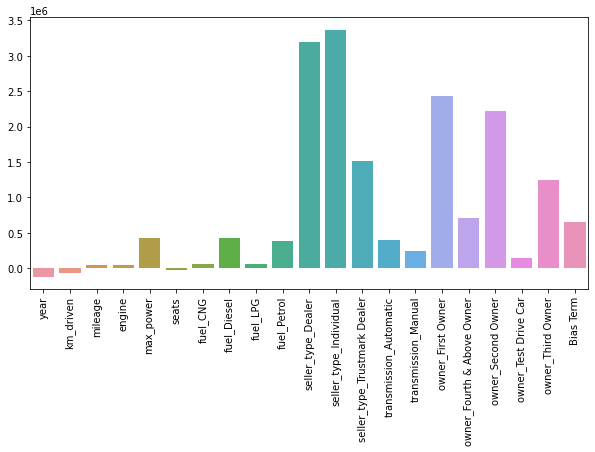

In [40]:
### Your code here
features = list(transformed_auto_df.columns)
features.append("Bias Term")
fig = plt.figure(figsize = (10,5))
ax = sns.barplot(x=features, y=linearRegModel.w)
ax.tick_params(axis='x', rotation=90)

**Tune Regularization Parameter $\alpha$**

**Now, let's do ridge regression and tune the $\alpha$ regularization parameter on the auto MPG dataset.**

**1.13. Sweep out values for $\alpha$ using `alphas = np.logspace(-2, 1, 10)`. Perform a grid search over these $\alpha$ values, recording the training and validation MSEs for each $\alpha$. A simple grid search is fine, no need for k-fold cross validation. Plot the training and validation MSEs as a function of $\alpha$ on a single figure. Make sure to label the axes and the training and validation MSE curves. Use a log scale for the x-axis.**

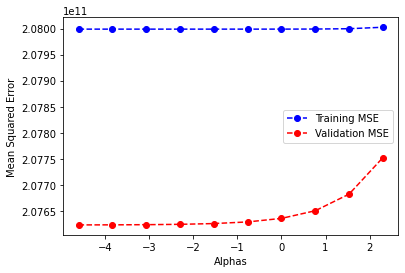

In [41]:
### Your code here
alphas = np.logspace(-2, 1, 10)
training_MSEs = []
validation_MSEs = []
for a in alphas:
    linearRegModel = LinearRegression(a)
    linearRegModel.train(X_train, y_train)
    training_MSEs.append(mse(y_train, linearRegModel.predict(X_train)))
    validation_MSEs.append(mse(y_val, linearRegModel.predict(X_val)))

plt.plot(np.log(alphas), training_MSEs, '--bo', label = "Training MSE")
plt.plot(np.log(alphas), validation_MSEs, '--ro', label = "Validation MSE")
plt.xlabel("Alphas")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()

**Explain your plot above. How do training and validation MSE behave with decreasing model complexity (increasing $\alpha$)?**

In [42]:
### Your answer here
print("Both seem to improve with decreasing model complexity, or by increasing alpha. This makes sense because simpler models usually perform better")

Both seem to improve with decreasing model complexity, or by increasing alpha. This makes sense because simpler models usually perform better


**1.14. Using the $\alpha$ which gave the best validation MSE above, train a model on the training set. Report the value of $\alpha$ and its training, validation, and test MSE. This is the final tuned model which you would deploy in production.**

In [43]:
### Your code here
bestAlpha = alphas[validation_MSEs.index(max(validation_MSEs))]
linearRegModel = LinearRegression(bestAlpha)
linearRegModel.train(X_train, y_train)

print("Tuned, best alpha value:\t\t"+str(bestAlpha))
print("Final Tuned Model Training Set MSE:\t" + str(mse(y_train, linearRegModel.predict(X_train))))
print("Final Tuned Model Validation Set MSE:\t" + str(mse(y_val, linearRegModel.predict(X_val))))
print("Final Tuned Model Test Set MSE:\t\t" + str(mse(y_test, linearRegModel.predict(X_test))))

Tuned, best alpha value:		10.0
Final Tuned Model Training Set MSE:	208002506499.44577
Final Tuned Model Validation Set MSE:	207752278308.3771
Final Tuned Model Test Set MSE:		217178062503.95114


# **Part 2: Logistic Regression**

**Gender Recognition by Voice and Speech Analysis**

**This dataset is used to identify a voice as male or female, based upon acoustic properties of the voice and speech.**

In [44]:
voice_df = pd.read_csv("voice-classification.csv")
voice_df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


**Data - Checking Rows & Columns**

In [45]:
#Number of Rows & Columns
print(voice_df.shape) 

(3168, 21)


**2.1 What is the probability of observing different  categories in the Label feature of the dataset?**

This is mainly to check class imbalance in the dataset, and to apply different techniques to balance the dataset, which we will learn later.

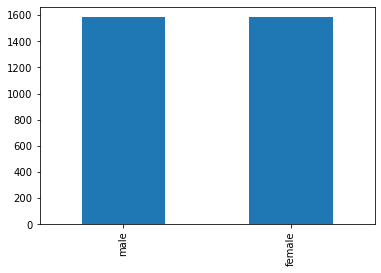

The categories in the Label feature seem balanced
male      1584
female    1584
Name: label, dtype: int64


In [46]:
#code here
#voice_df["label"]
fig, ax = plt.subplots()
voice_df['label'].value_counts().plot(ax=ax, kind='bar')
plt.show()
print("The categories in the Label feature seem balanced")
print(voice_df['label'].value_counts())

**2.2 Plot the relationships between the label and the 20 numerical features using a small multiple of box plots. Make sure to label the axes. What useful information do this plot provide?**

These plots provide a great deal of useful information. Because these boxplots all seem to have significant overlap, there is not a single feature that will make this categorization easier. However, some features do seem to show a more significant difference than others. 


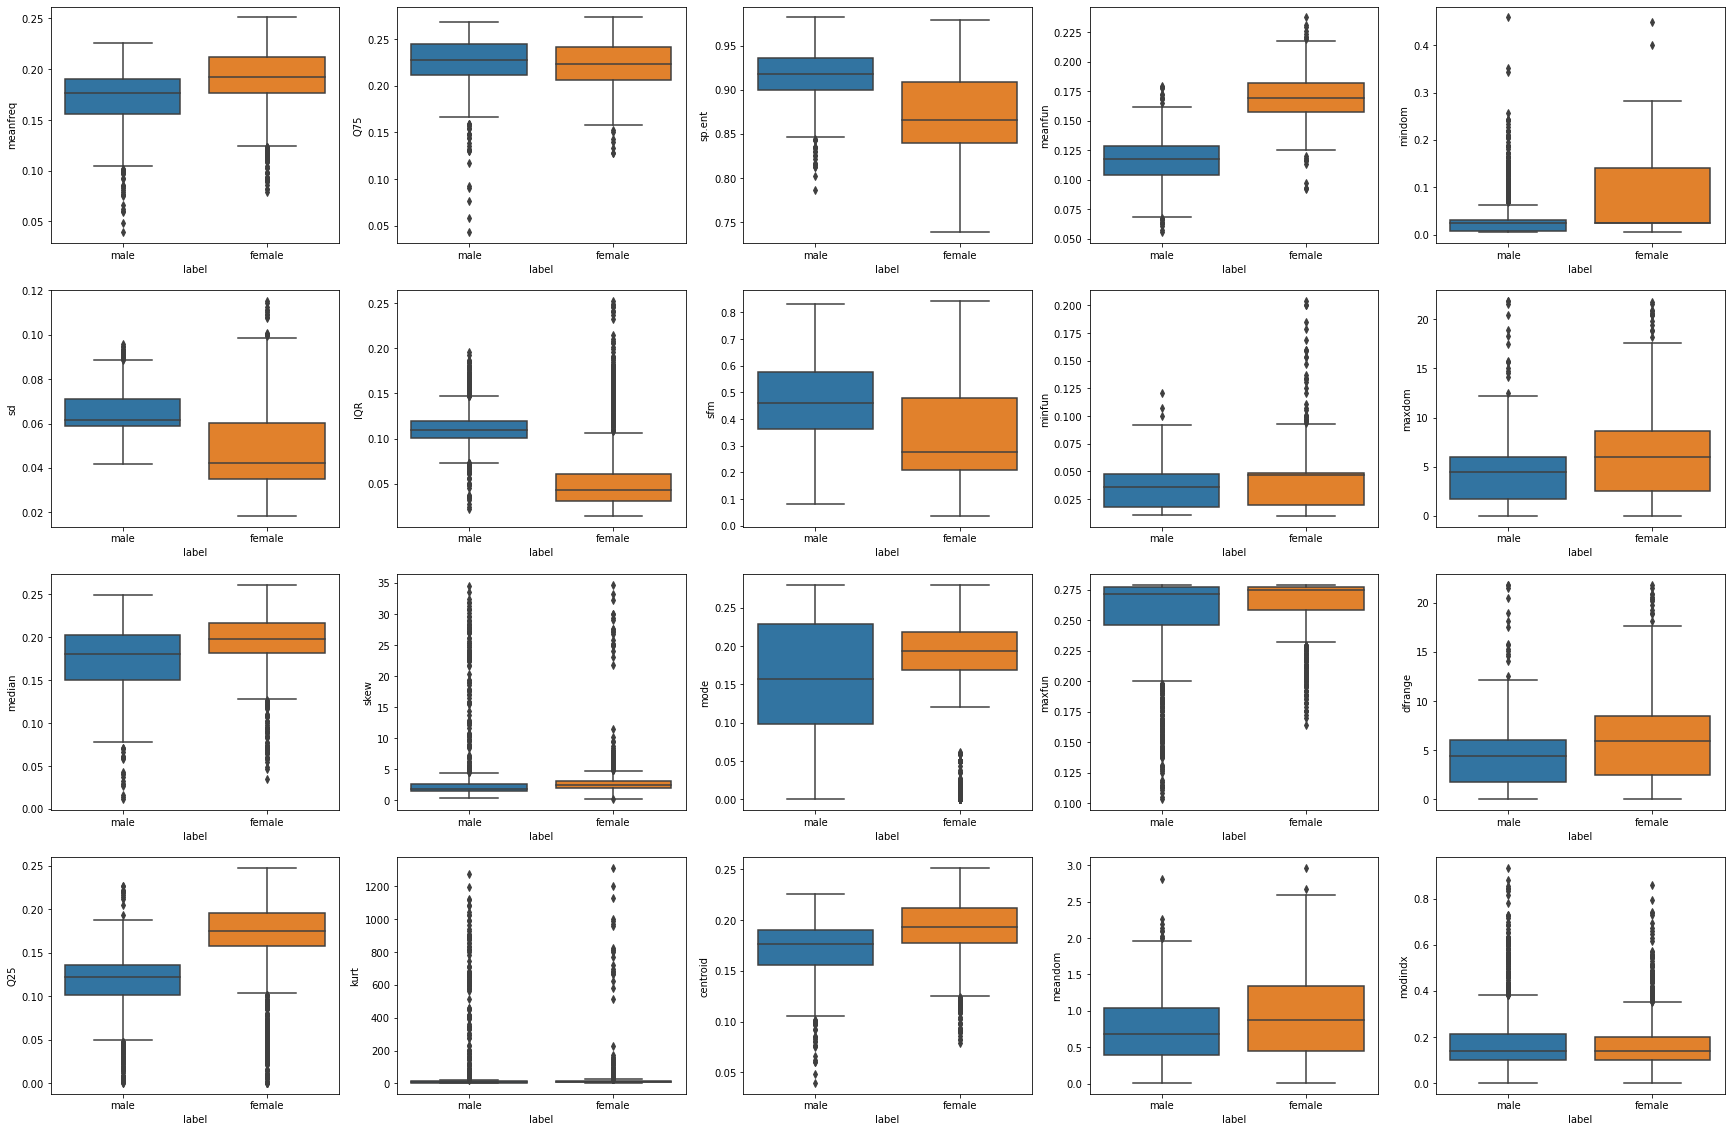

In [47]:
figure, axes = plt.subplots(4, 5, figsize = (30, 20))
features = list(voice_df.columns)[:20]
for index, feature in enumerate(features):
    xval = index%4
    yval = int(index/4)
    sns.boxplot(x='label',y=feature, data=voice_df, ax=axes[xval,yval])
print("These plots provide a great deal of useful information. Because these boxplots all seem to have significant overlap, there is not a single feature that will make this categorization easier. However, some features do seem to show a more significant difference than others. ")

**2.3 Plot the correlation matrix, and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop those highly correlated features from the dataframe. Why is necessary to drop those columns before proceeding further?**

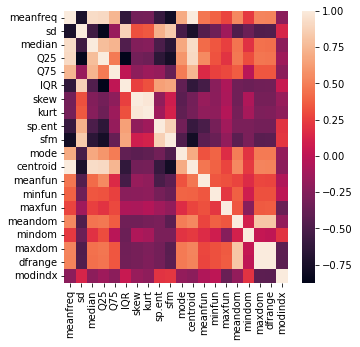

Top Absolute Correlations
<class 'pandas.core.series.Series'>


0
meanfreq centroid  1.000000
maxdom   dfrange   0.999838
skew     kurt      0.977020
median   centroid  0.925445
meanfreq median    0.925445
         Q25       0.911416
Q25      centroid  0.911416

['kurt', 'centroid', 'Q25', 'median', 'dfrange']
It is important to remove these highly correlated features because multicolinearity may lead to solutions that are varying and numerically unstable


In [48]:
corr = voice_df.corr()
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corr)
threshold = 0.9
plt.show()

def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, threshold = 0.9):
    au_corr = df.abs().unstack()
    print(type(au_corr))
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False).to_frame()
    au_corr = au_corr[au_corr[0] >= threshold]
    return au_corr

print("Top Absolute Correlations")
topCorr = get_top_abs_correlations(corr, 0.9)
display(topCorr)
toDrop = list(set([x[1] for x in topCorr.index.values]))
print(toDrop)
filtered_voice_df = voice_df.drop(labels=toDrop, axis=1)
print("It is important to remove these highly correlated features because multicolinearity may lead to solutions that are varying and numerically unstable")

**Separating Features & Y variable from the processed dataset**

**Please note to replace the dataframe below with the new dataframe created after removing highly correlated features**

In [49]:
# Split data into features and labels
voice_X = filtered_voice_df.drop(columns=['label']) #replace "voice_df1" with your dataframe from 2.3 to make sure the code runs
voice_y = filtered_voice_df['label']
print(voice_X.columns)

Index(['meanfreq', 'sd', 'Q75', 'IQR', 'skew', 'sp.ent', 'sfm', 'mode',
       'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom',
       'modindx'],
      dtype='object')


**2.4 Apply the following pre-processing steps:**

1) Use OrdinalEncoding to encode the label in the dataset (male & female)

2) Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model.

3)Split the dataset into training (60%), validation (20%), and test (20%) sets.

4) Standardize the columns in the feature matrices. To avoid information leakage, learn the standardization parameters from training, and then apply training, validation and test dataset.

5) Add a column of ones to the feature matrices of train, validation and test dataset. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

In [50]:
# 1/2. Encode the label in the dataset, and convert to numpy vector
print(">>>Part 1/2: Ordinal encoding/Conversion to numpy")
print("Data before ordinal encoding:\t")
display(voice_y.head())

print("Data after ordinal encoding/conversion to numpy:")
gender_mapper = {"male":0, "female":1}
voice_y = voice_y.replace(gender_mapper)
voice_y = voice_y.to_numpy()
print(voice_y)

# 3. Split the dataset into training (60%), validation (20%), and test (20%) sets
X_dev, X_test, y_dev, y_test = train_test_split(voice_X, voice_y, test_size = 0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size = 0.25, random_state=84)
print("\n>>>Part 3: Train-test split")
print("Shape of training data\nX_train:\t" + str(X_train.shape) + "\ny_train:\t" + str(y_train.shape))
print("\nShape of validation data\nX_val:\t\t" + str(X_val.shape) + "\ny_val:\t\t" + str(y_val.shape))
print("\nShape of test data\nX_test:\t\t" + str(X_test.shape) + "\ny_test:\t\t" + str(y_test.shape))


# 4. Standardize the columns in the feature matrices
print("\n>>>Part 4/5: Scaling data and adding 1s")
print("First row of X_train before:")
print(np.asarray([round(num, 8) for num in X_train.head(1).values.tolist()[0]]))
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) #fit and transform based on x_train, but only transform for val and test
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


# 5. Add a column of ones to the feature matrices
X_train = np.hstack((X_train_scaled, np.ones((len(X_train_scaled),1))))
X_val = np.hstack((X_val_scaled, np.ones((len(X_val_scaled),1))))
X_test = np.hstack((X_test_scaled, np.ones((len(X_test_scaled),1))))
print("\nFirst row of X_train after:")
print(X_train[0])

>>>Part 1/2: Ordinal encoding/Conversion to numpy
Data before ordinal encoding:	


0    male
1    male
2    male
3    male
4    male
Name: label, dtype: object

Data after ordinal encoding/conversion to numpy:
[0 0 0 ... 1 1 1]

>>>Part 3: Train-test split
Shape of training data
X_train:	(1900, 15)
y_train:	(1900,)

Shape of validation data
X_val:		(634, 15)
y_val:		(634,)

Shape of test data
X_test:		(634, 15)
y_test:		(634,)

>>>Part 4/5: Scaling data and adding 1s
First row of X_train before:
[0.20855907 0.03942026 0.22710645 0.03022489 3.1048892  0.84013854
 0.27603304 0.21241379 0.17152469 0.04853387 0.27745665 1.44497283
 0.0234375  7.5703125  0.07572862]

First row of X_train after:
[ 0.92810852 -1.04929751  0.10142764 -1.25571826 -0.01439802 -1.1898484
 -0.73465153  0.59936436  0.8979924   0.60604727  0.6172792   1.14312763
 -0.47088706  0.67858718 -0.8089197   1.        ]


**2.5 Implement Logistic Regression**

We will now implement logistic regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for logistic regression is:

$$
y = \sigma(X w)
$$

where $\sigma(x) = \frac{1}{1 + e^{-x}}$, i.e. the sigmoid function. This function scales the prediction to be a probability between 0 and 1, and can then be thresholded to get a discrete class prediction.

Just as with linear regression, our objective in logistic regression is to learn the weights $𝑤$ which best fit the data. For L2-regularized logistic regression, we find an optimal $w$ to minimize the following loss function:

$$
\min_{w} \ -y^T \ \text{log}(\sigma(Xw)) \ - \  (\mathbf{1} - y)^T \ \text{log}(\mathbf{1} - \sigma(Xw)) \ + \ \alpha \| w \|^2_2 \\
$$

Unlike linear regression, however, logistic regression has no closed-form solution for the optimal $w$. So, we will use gradient descent to find the optimal $w$. The (n x 1) gradient vector $g$ for the loss function above is:

$$
g = X^T \Big(\sigma(Xw) - y\Big) + 2 \alpha w
$$

Below is pseudocode for gradient descent to find the optimal $w$. You should first initialize $w$ (e.g. to a (n x 1) zero vector). Then, for some number of epochs $t$, you should update $w$ with $w - \eta g $, where $\eta$ is the learning rate and $g$ is the gradient. You can learn more about gradient descent [here](https://www.coursera.org/lecture/machine-learning/gradient-descent-8SpIM).

> $w = \mathbf{0}$
> 
> $\text{for } i = 1, 2, ..., t$
>
> $\quad \quad w = w - \eta g $


Implement a LogisticRegression class with five methods: train, predict, calculate_loss, calculate_gradient, and calculate_sigmoid. **You may NOT use sklearn for this implementation. It is highly recommended that you vectorize your code.**

In [51]:
class LogisticRegression():
    '''
    Logistic regression model with L2 regularization.

    Attributes
    ----------
    alpha: regularization parameter
    t: number of epochs to run gradient descent
    eta: learning rate for gradient descent
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha, t, eta):
        self.alpha = alpha
        self.t = t
        self.eta = eta
        self.w = None

    def train(self, X, y):
        '''Trains logistic regression model using gradient descent 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        losses: (t x 1) vector of losses at each epoch of gradient descent
        '''
        self.w = np.zeros(X.shape[1])
        losses = []
        for i in range(self.t):
            self.w = self.w - self.eta*self.calculate_gradient(X, y)
            losses.append(self.calculate_loss(X, y))
            
        return losses
        
        
    def predict(self, X):
        '''Predicts on X using trained model. Make sure to threshold 
        the predicted probability to return a 0 or 1 prediction.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) 0/1 prediction vector
        '''
        y_pred = self.calculate_sigmoid((X.dot(self.w)))
        y_pred = np.rint(y_pred)
        return y_pred
        ### Your code here
    
    def calculate_loss(self, X, y):
        '''Calculates the logistic regression loss using X, y, w, 
        and alpha. Useful as a helper function for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        loss: (scalar) logistic regression loss
        '''
        sigmoid_Xw = self.calculate_sigmoid(X.dot(self.w))
        firstTerm = -1*(y.T).dot(np.log(sigmoid_Xw))
        secondTerm = -1*((1-y).T).dot(np.log(1-sigmoid_Xw))
        
        norm = 0
        for w_i in self.w:
            norm += np.power(w_i, 2)
        norm = np.sqrt(norm)
        thirdTerm = self.alpha*(norm)
        loss = firstTerm + secondTerm + thirdTerm
        return loss
        
    
    def calculate_gradient(self, X, y):
        '''Calculates the gradient of the logistic regression loss 
        using X, y, w, and alpha. Useful as a helper function 
        for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        gradient: (n x 1) gradient vector for logistic regression loss
        '''
        inner = self.calculate_sigmoid(X.dot(self.w))-y
        gradient = (X.T).dot(inner) + 2*self.alpha*self.w
        return gradient
    
    def calculate_sigmoid(self, x):
        '''Calculates the sigmoid function on each element in vector x. 
        Useful as a helper function for predict(), calculate_loss(), 
        and calculate_gradient().
        
        Parameters
        ----------
        x: (m x 1) vector
        
        Returns
        -------
        sigmoid_x: (m x 1) vector of sigmoid on each element in x
        '''
        sigmoid_x = 1 / (1 + np.exp(-x))
        return sigmoid_x
        
        
        ### Your code here

**2.6 Plot Loss over Epoch and Search the space randomly to find best hyperparameters.**

A: Using your implementation above, train a logistic regression model **(alpha=0, t=100, eta=1e-3)** on the voice recognition training data. Plot the training loss over epochs. Make sure to label your axes. You should see the loss decreasing and start to converge. 

B: Using **alpha between (0,1), eta between(0, 0.001) and t between (0, 100)**, find the best hyperparameters for LogisticRegression. You can randomly search the space 20 times to find the best hyperparameters.

C. Compare accuracy on the test dataset for both the scenarios.

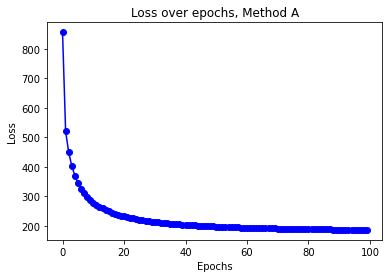

Alpha value:		0
Epoch length:		100
Learning rate:		0.001
Loss:			185.96690533096108


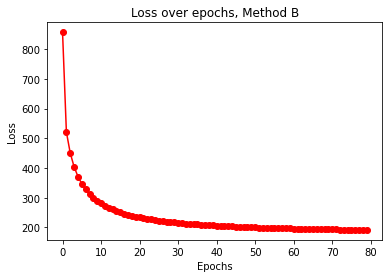

Best alpha value:	0.31622776601683794
Best epoch length:	80.0
Best learning rate:	0.001
Best Loss:		191.53892694921984


Scenario A's Accuracy on Test Dataset:	0.9794952681388013
Scenario B's Accuracy on Test Dataset:	0.9794952681388013


In [52]:
#Part A: Training with given hyperparameters
presetAlpha, preset_t, presetEta = 0, 100, 1e-3
logRegA = LogisticRegression(presetAlpha, preset_t, presetEta)
lossesA = logRegA.train(X_train, y_train)
plt.plot(lossesA, '-bo')
plt.title("Loss over epochs, Method A")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()
print("Alpha value:\t\t"+str(presetAlpha))
print("Epoch length:\t\t"+str(preset_t))
print("Learning rate:\t\t"+str(presetEta))
print("Loss:\t\t\t"+str(lossesA[-1]))

#Part B: Finding the best hyperparameters by randomly searching the space
import random
import itertools
alphas = np.logspace(-2, 0, 5)
t_epochs = np.linspace(20, 100, 5)
etas = np.logspace(-5, -3, 5)

hparamSearchSpace = list(set(itertools.product(alphas,t_epochs, etas)))
rand_hParams = random.sample(hparamSearchSpace, 20)

bestLoss = np.inf
#for alpha, t, eta in hparamSearchSpace: #could do this to search whole space
for alpha, t, eta in rand_hParams:
    logRegSearch = LogisticRegression(alpha, int(t), eta)
    thisLoss = logRegSearch.train(X_train, y_train)
    #print(thisLoss[-1])
    if thisLoss[-1] < bestLoss:
        bestLoss = thisLoss[-1]
        bestAlpha, best_t, bestEta, bestLosses = alpha, t, eta, thisLoss
        bestModel = logRegSearch
        
plt.plot(bestLosses, '-ro')
plt.title("Loss over epochs, Method B")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()
print("Best alpha value:\t"+str(bestAlpha))
print("Best epoch length:\t"+str(best_t))
print("Best learning rate:\t"+str(bestEta))
print("Best Loss:\t\t"+str(bestLoss))

#Part C: Comparing accuracy for both scenarios
yA_pred = logRegA.predict(X_test)
yB_pred = bestModel.predict(X_test)

A_accuracy = 1-np.mean(np.abs(yA_pred-y_test))
B_accuracy = 1-np.mean(np.abs(yB_pred-y_test))

print("\n\nScenario A's Accuracy on Test Dataset:\t"+str(A_accuracy))
print("Scenario B's Accuracy on Test Dataset:\t"+str(B_accuracy))

**2.7 Feature Importance**

Interpret your trained model using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term! 

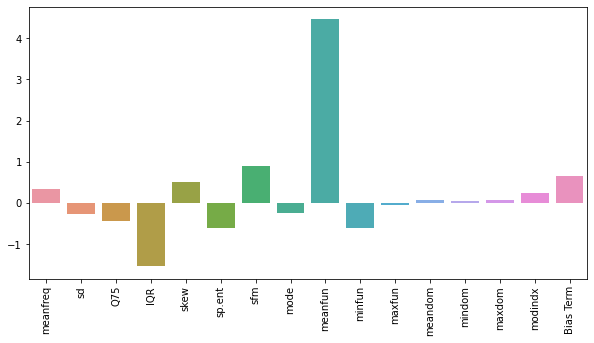

In [53]:
features = list(voice_X.columns)
features.append("Bias Term")
fig = plt.figure(figsize = (10,5))
ax = sns.barplot(x=features, y=logRegA.w)
ax.tick_params(axis='x', rotation=90)


# **Part 3: Support Vector Machines - with the same Dataset**

**3.1 Dual SVM**

A) Train a dual SVM (with default parameters) for both kernel=“linear” and kernel=“rbf”) on the Voice Recognition training data.

B) Make predictions and report the accuracy on the training, validation, and test sets. Which kernel gave better accuracy on test dataset and why do you think that was better?

C) Please report the support vectors in both the cases and what do you observe? Explain


In [54]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
print("Class Distribution:")
voice_y = pd.Series(voice_y)
print(voice_y.value_counts())
print("Dataset Size:")
print(voice_X.shape)
feature_names = list(voice_X.columns)
dev_X, test_X, dev_y, test_y = train_test_split(voice_X, voice_y, test_size=0.2, random_state=42)
preprocess = make_column_transformer((StandardScaler(), feature_names))
pipe_linear = make_pipeline(preprocess, SVC(kernel='linear'))
pipe_rbf = make_pipeline(preprocess, SVC(kernel='rbf'))
pipe_linear.fit(dev_X, dev_y)
pipe_rbf.fit(dev_X, dev_y)

print(f"\nLinear Kernel Test Score:\t", pipe_linear.score(test_X, test_y))
print(f"RBF Kernel Test Score:\t", pipe_rbf.score(test_X, test_y))
print("\nThe RBF Kernel gave better accuracy on the test dataset. It is usually recommended to use a linear kernel when the number of features is large, and a non-linear RBF (Gaussian) kernel when the number of samples is large. This is because a linear kernel is never more accurate than a properly tuned Gaussian kernel, it is mainly used because it is faster on datasets with many features. ")

Class Distribution:
0    1584
1    1584
dtype: int64
Dataset Size:
(3168, 15)

Linear Kernel Test Score:	 0.9763406940063092
RBF Kernel Test Score:	 0.9810725552050473

The RBF Kernel gave better accuracy on the test dataset. It is usually recommended to use a linear kernel when the number of features is large, and a non-linear RBF (Gaussian) kernel when the number of samples is large. This is because a linear kernel is never more accurate than a properly tuned Gaussian kernel, it is mainly used because it is faster on datasets with many features. 


**3.2 Using Kernel “rbf”, tune the hyperparameter “C” using the Grid Search & k-fold cross validation. You may take k=5 and assume values in grid between 1 to 100 with interval range of your choice.**

In [55]:
from sklearn.model_selection import GridSearchCV
pipe = make_pipeline(preprocess, 
                     GridSearchCV(SVC(kernel='rbf'), param_grid = {"C":np.logspace(0, 2, 20)}, cv=5))
pipe.fit(dev_X, dev_y)
grid_search_results = pipe.named_steps["gridsearchcv"]
print(f"Best Score:\t", grid_search_results.best_score_)
print(f"Best Params:\t", grid_search_results.best_params_)
print(f"Test Score:\t", pipe.score(test_X, test_y))

Best Score:	 0.9822446227128502
Best Params:	 {'C': 1.6237767391887217}
Test Score:	 0.9810725552050473
